In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt



In [3]:
def initialize_grid(M, N, I0):
    grid = np.zeros((M, N), dtype=int)
    infected_positions = np.random.choice(M * N, I0, replace=False)
    for pos in infected_positions:
        grid[pos // N, pos % N] = 1  # Posiciones iniciales de infectados
    return grid

In [4]:
def count_infected_neighbors(grid, i, j, rad):
    M, N = grid.shape
    infected_count = 0
    for x in range(max(0, i - rad), min(M, i + rad + 1)):
        for y in range(max(0, j - rad), min(N, j + rad + 1)):
            if (x, y) != (i, j) and grid[x, y] == 1:
                infected_count += 1
    return infected_count

In [5]:
def update_state(grid, i, j, beta, gamma, rad):
    if grid[i, j] == 0:  # Susceptible
        infected_neighbors = count_infected_neighbors(grid, i, j, rad)
        if np.random.rand() < beta * infected_neighbors:
            return 1  # Se infecta
    elif grid[i, j] == 1:  # Infectado
        if np.random.rand() < gamma:
            return 2  # Se recupera
    return grid[i, j]


In [6]:
def simulate_SIR(M, N, T, I0, rad, beta, gamma):
    grid = initialize_grid(M, N, I0)
    history = [grid.copy()]
    S_counts, I_counts, R_counts = [np.sum(grid == 0)], [np.sum(grid == 1)], [np.sum(grid == 2)]
    
    for t in range(T):
        new_grid = grid.copy()
        for i in range(M):
            for j in range(N):
                new_grid[i, j] = update_state(grid, i, j, beta, gamma, rad)
        grid = new_grid
        history.append(grid.copy())
        S_counts.append(np.sum(grid == 0))
        I_counts.append(np.sum(grid == 1))
        R_counts.append(np.sum(grid == 2))
    
    return history, S_counts, I_counts, R_counts


In [7]:
# Parámetros de la simulación
M, N = 100, 100     # Tamaño de la población
T = 650             # Tiempo de simulación
I0 = 2              # Número inicial de celdas infectadas
rad = 1             # Radio de interacción
beta = 0.1          # Probabilidad de infección
gamma = 0.25        # Probabilidad de recuperación

# Ejecutar la simulación
history, S_counts, I_counts, R_counts = simulate_SIR(M, N, T, I0, rad, beta, gamma)

In [8]:
# Función para graficar el grid en diferentes momentos de tiempo
def plot_grid_snapshots(history, times=[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]):
    fig, axes = plt.subplots(1, len(times), figsize=(15, 3))
    for ax, t in zip(axes, times):
        ax.imshow(history[t], cmap='viridis', vmin=0, vmax=2)
        ax.set_title(f'Tiempo {t}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

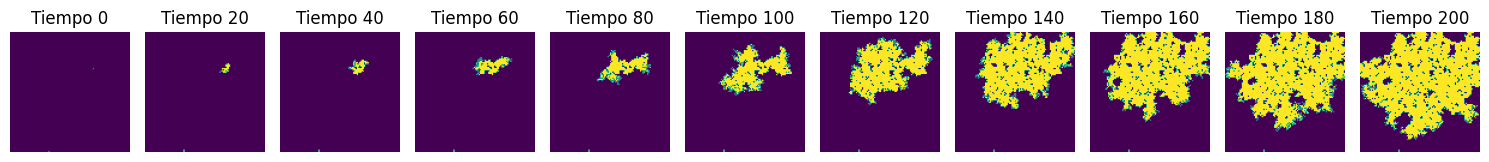

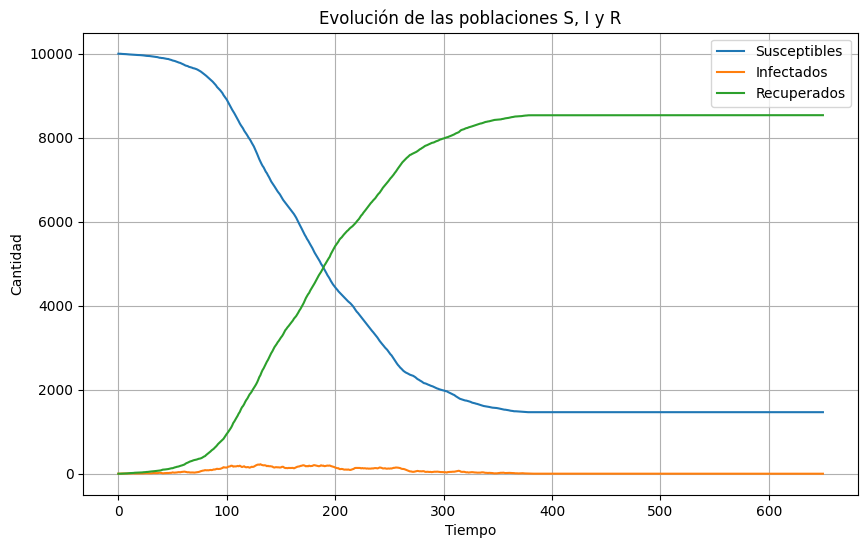

In [9]:
# Graficar snapshots del grid
plot_grid_snapshots(history)

# Gráficos de la evolución de las poblaciones S, I y R
plt.figure(figsize=(10, 6))
plt.plot(S_counts, label='Susceptibles')
plt.plot(I_counts, label='Infectados')
plt.plot(R_counts, label='Recuperados')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad')
plt.title('Evolución de las poblaciones S, I y R')
plt.legend()
plt.grid()
plt.show()

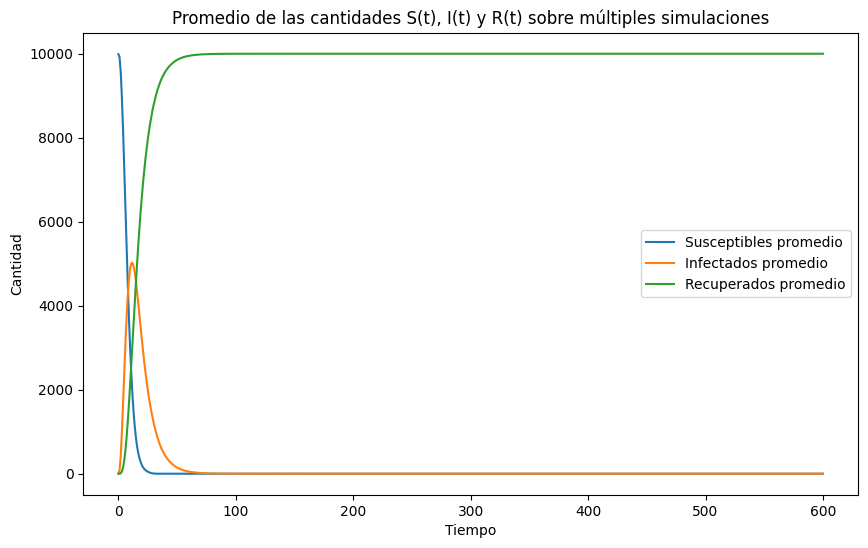

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_multiple_SIR(Nexp, M, N, T, I0, rad, beta, gamma):
    S_counts_all = np.zeros((Nexp, T + 1))
    I_counts_all = np.zeros((Nexp, T + 1))
    R_counts_all = np.zeros((Nexp, T + 1))
    
    for exp in range(Nexp):
        _, S_counts, I_counts, R_counts = simulate_SIR(M, N, T, I0, rad, beta, gamma)
        S_counts_all[exp, :] = S_counts
        I_counts_all[exp, :] = I_counts
        R_counts_all[exp, :] = R_counts
    
    S_avg = np.mean(S_counts_all, axis=0)
    I_avg = np.mean(I_counts_all, axis=0)
    R_avg = np.mean(R_counts_all, axis=0)
    
    return S_avg, I_avg, R_avg


M = 100  
N = 100  
T = 600  
I0 = 10 
rad = 2 
beta = 0.3  
gamma = 0.1 
Nexp = 100  


S_avg, I_avg, R_avg = simulate_multiple_SIR(Nexp, M, N, T, I0, rad, beta, gamma)


plt.figure(figsize=(10, 6))
plt.plot(S_avg, label='Susceptibles promedio')
plt.plot(I_avg, label='Infectados promedio')
plt.plot(R_avg, label='Recuperados promedio')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad')
plt.legend()
plt.title('Promedio de las cantidades S(t), I(t) y R(t) sobre múltiples simulaciones')
plt.show()
